In [1]:
#imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings as wrn
wrn.filterwarnings('ignore')

In [7]:
data = pd.read_csv('C:/Users/saket/Desktop/PROJECTS/datasets/nifty50.csv',index_col='Date')
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-09-17,4518.450195,4549.049805,4482.850098,4494.649902,4494.649902,0.0
2007-09-18,4494.100098,4551.799805,4481.549805,4546.200195,4546.200195,0.0
2007-09-19,4550.250000,4739.000000,4550.250000,4732.350098,4732.350098,0.0
2007-09-20,4734.850098,4760.850098,4721.149902,4747.549805,4747.549805,0.0
2007-09-21,4752.950195,4855.700195,4733.700195,4837.549805,4837.549805,0.0


In [8]:
data.isna().sum()

Open         35
High         35
Low          35
Close        35
Adj Close    35
Volume       35
dtype: int64

##DEALING WITH THE MISSING VALUES

In [9]:
#trades has lot of missing values of just drop it
data.drop('Trades',axis=1,inplace=True)

#we will use imputation for other missing values
median1=data['Deliverable Volume'].median()
median2=data['%Deliverble'].median()
data['Deliverable Volume']=data['Deliverable Volume'].fillna(median1)
data['%Deliverble']=data['%Deliverble'].fillna(median2)

KeyError: "['Trades'] not found in axis"

In [10]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-09-17,4518.450195,4549.049805,4482.850098,4494.649902,4494.649902,0.0
2007-09-18,4494.100098,4551.799805,4481.549805,4546.200195,4546.200195,0.0
2007-09-19,4550.250000,4739.000000,4550.250000,4732.350098,4732.350098,0.0
2007-09-20,4734.850098,4760.850098,4721.149902,4747.549805,4747.549805,0.0
2007-09-21,4752.950195,4855.700195,4733.700195,4837.549805,4837.549805,0.0


In [11]:
data.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object

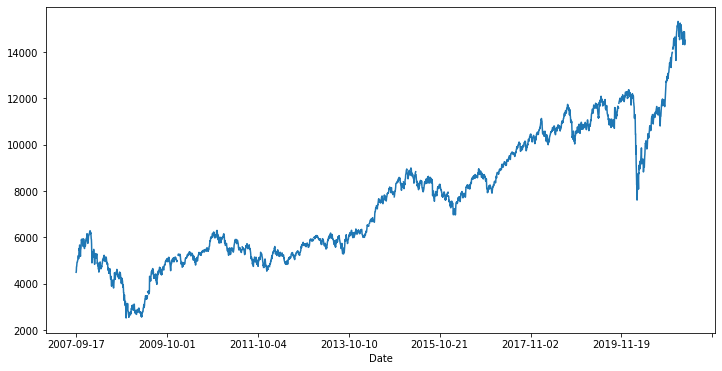

In [12]:
plt.figure(figsize=(12,6))
data['Close'].plot()

In [13]:
###calculate the rolling mean and stnd deviation of selected columns 
features=['High','Low','Volume','Open']
window1=3
window2=7
for feature in features:
    data[feature+'rolling_mean_3']=data[feature].rolling(window=window1).mean()
    data[feature+'rolling_mean_7']=data[feature].rolling(window=window2).mean()
for feature in features:
    data[feature+'rolling_stnd_3']=data[feature].rolling(window=window1).std()
    data[feature+'rolling_stnd_7']=data[feature].rolling(window=window2).std()
data.head()
    

,Open,High,Low,Close,Adj Close,Volume,Highrolling_mean_3,Highrolling_mean_7,Lowrolling_mean_3,Lowrolling_mean_7,...,Openrolling_mean_3,Openrolling_mean_7,Highrolling_stnd_3,Highrolling_stnd_7,Lowrolling_stnd_3,Lowrolling_stnd_7,Volumerolling_stnd_3,Volumerolling_stnd_7,Openrolling_stnd_3,Openrolling_stnd_7
Date,,,,,,,,,,,,,,,,,,,,,
2007-09-17,4518.450195,4549.049805,4482.850098,4494.649902,4494.649902,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-09-18,4494.100098,4551.799805,4481.549805,4546.200195,4546.200195,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-09-19,4550.250000,4739.000000,4550.250000,4732.350098,4732.350098,0.0,4613.283203,NaN,4504.883301,NaN,...,4520.933431,NaN,108.882622,NaN,39.294093,NaN,0.0,NaN,28.157197,NaN
2007-09-20,4734.850098,4760.850098,4721.149902,4747.549805,4747.549805,0.0,4683.883301,NaN,4584.316569,NaN,...,4593.066732,NaN,114.908199,NaN,123.379293,NaN,0.0,NaN,125.956719,NaN
2007-09-21,4752.950195,4855.700195,4733.700195,4837.549805,4837.549805,0.0,4785.183431,NaN,4668.366699,NaN,...,4679.350098,NaN,62.038836,NaN,102.484357,NaN,0.0,NaN,112.169647,NaN


In [14]:
data.isna().sum()

Open                     35
High                     35
Low                      35
Close                    35
Adj Close                35
Volume                   35
Highrolling_mean_3       99
Highrolling_mean_7      223
Lowrolling_mean_3        99
Lowrolling_mean_7       223
Volumerolling_mean_3     99
Volumerolling_mean_7    223
Openrolling_mean_3       99
Openrolling_mean_7      223
Highrolling_stnd_3       99
Highrolling_stnd_7      223
Lowrolling_stnd_3        99
Lowrolling_stnd_7       223
Volumerolling_stnd_3     99
Volumerolling_stnd_7    223
Openrolling_stnd_3       99
Openrolling_stnd_7      223
dtype: int64

In [16]:
#drop the negligible null values 
data.dropna(inplace=True)
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Highrolling_mean_3', 'Highrolling_mean_7', 'Lowrolling_mean_3',
       'Lowrolling_mean_7', 'Volumerolling_mean_3', 'Volumerolling_mean_7',
       'Openrolling_mean_3', 'Openrolling_mean_7', 'Highrolling_stnd_3',
       'Highrolling_stnd_7', 'Lowrolling_stnd_3', 'Lowrolling_stnd_7',
       'Volumerolling_stnd_3', 'Volumerolling_stnd_7', 'Openrolling_stnd_3',
       'Openrolling_stnd_7'],
      dtype='object')

In [17]:
#select independent features
data.columns
ind_features=['Highrolling_mean_3', 'Highrolling_mean_7', 'Lowrolling_mean_3',
       'Lowrolling_mean_7', 'Volumerolling_mean_3', 'Volumerolling_mean_7',
       'Openrolling_mean_3', 'Openrolling_mean_7', 'Highrolling_stnd_3',
       'Highrolling_stnd_7', 'Lowrolling_stnd_3', 'Lowrolling_stnd_7',
       'Volumerolling_stnd_3', 'Volumerolling_stnd_7', 'Openrolling_stnd_3',
       'Openrolling_stnd_7']
#data.columns

##Timeseries data needs to be divided based on date. So train_test_split not a good option.


In [19]:
##splitting the data
train_size=int(len(data)*0.65)
test_size=len(data)-train_size

train_data=data[:train_size]
test_data=data[train_size:]


In [20]:
train_data.shape,test_data.shape

((2032, 22), (1095, 22))

### IMPLEMENTING AUTO ARIMA ML MODEL
#### open anaconda prompt
#### python -m pip install pmdarima --user

In [21]:
from pmdarima import auto_arima
model = auto_arima(y=train_data['Close'],exogenous=train_data[ind_features],trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=21480.489, Time=2.79 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=21856.630, Time=1.42 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=21564.080, Time=1.54 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=21478.285, Time=1.90 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=35300.997, Time=0.97 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=21480.504, Time=1.97 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=21480.883, Time=2.27 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=21479.440, Time=5.70 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=21476.323, Time=1.73 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=21478.543, Time=1.84 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=21478.920, Time=1.78 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=21562.117, Time=0.89 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=21478.034, Time=2.16 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0]          
Total fit time: 26.951 seconds


In [22]:
model.fit(train_data['Close'],train_data[ind_features])

ARIMA(order=(0, 0, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [23]:
forecast=model.predict(n_periods=len(test_data),exogenous=test_data[ind_features])

In [24]:
test_data['Forecast_ARIMA']=forecast

Text(0, 0.5, 'Price')

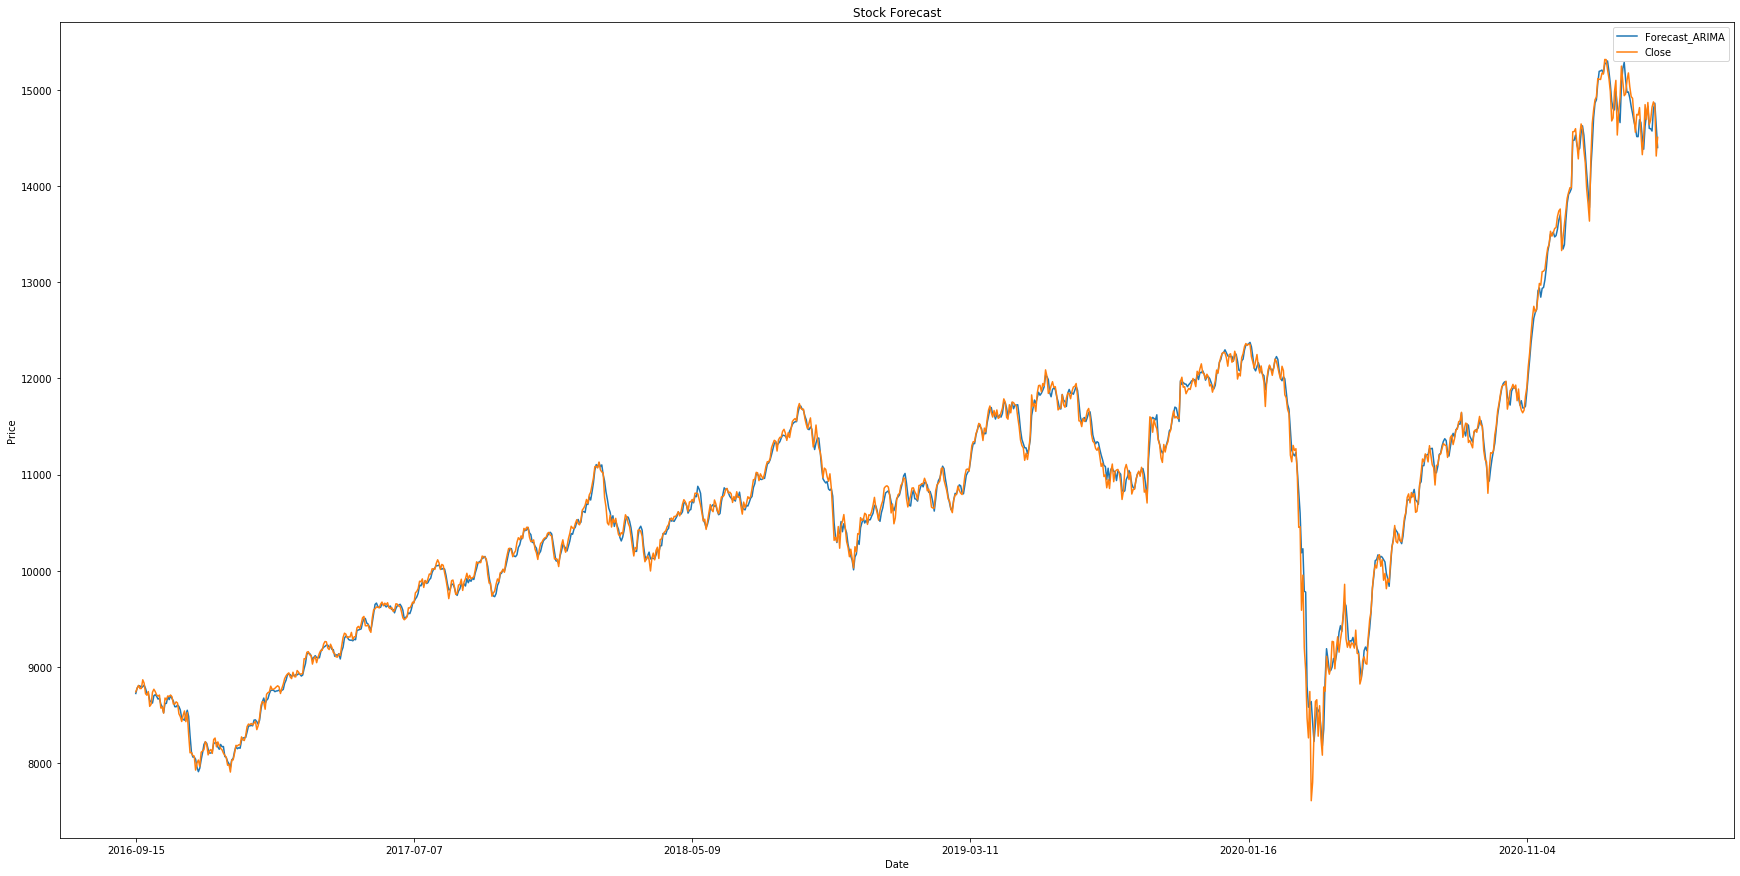

In [25]:
test_data[['Forecast_ARIMA','Close']].plot(figsize=(30,15))
plt.title('Stock Forecast')
plt.ylabel('Price')

In [26]:
#check accuracy
from sklearn.metrics import mean_absolute_error,mean_squared_error
MAE=mean_absolute_error(test_data['Close'],test_data['Forecast_ARIMA'])
RMSE=np.sqrt(mean_squared_error(test_data['Close'],test_data['Forecast_ARIMA']))

print('MAE:{}'.format(MAE))
print('RMSE:{}'.format(RMSE))

MAE:57.910206115640825
RMSE:91.99671009627993
